In [6]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.neighbors import KNeighborsClassifier
from sklearn.preprocessing import StandardScaler
from sklearn import metrics
import plotly.graph_objects as go
import plotly.express as px
import plotly.figure_factory as ff
from sklearn.impute import KNNImputer

# Numeric Imputer

In [17]:
data_url = "https://storage.googleapis.com/ai-experts/diabetes.csv"

# Load data
df = pd.read_csv(data_url)

In [18]:
# Columns where 0 indicates missing data
cols_with_missing = ['BMI', 'Insulin', 'SkinThickness']

In [19]:
# Replace zeros with np.nan in the specified columns
df[cols_with_missing] = df[cols_with_missing].replace(0, np.nan)

# check how many missing values per column
print("Missing values before imputation:")
print(df[cols_with_missing].isna().sum())

Missing values before imputation:
BMI               11
Insulin          374
SkinThickness    227
dtype: int64


<Axes: ylabel='Frequency'>

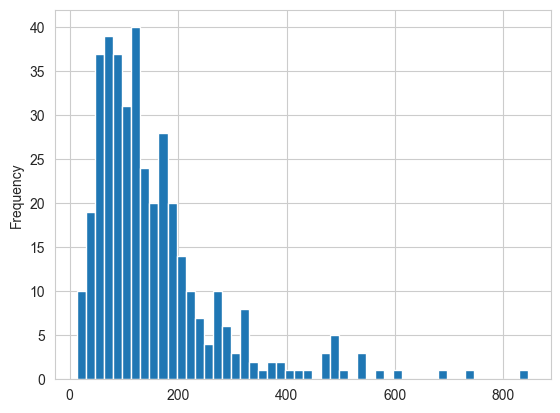

In [20]:
df['Insulin'].plot(kind='hist', bins=50)

In [5]:
# Normalize features before KNN (important!)
scaler = StandardScaler()
X_scaled = scaler.fit_transform(df.drop('Outcome', axis=1))

In [7]:
# Impute using KNN
imputer = KNNImputer(n_neighbors=5)
X_imputed = imputer.fit_transform(X_scaled)



In [8]:
# Replace imputed values back into a DataFrame
X_imputed_df = pd.DataFrame(X_imputed, columns=df.columns.drop('Outcome'))

In [9]:
# Re-attach target column
df_imputed = X_imputed_df.copy()
df_imputed['Outcome'] = df['Outcome'].values

# Check if missing values remain
print("\nMissing values after imputation:")
print(df_imputed.isna().sum())


Missing values after imputation:
Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64


<Axes: ylabel='Frequency'>

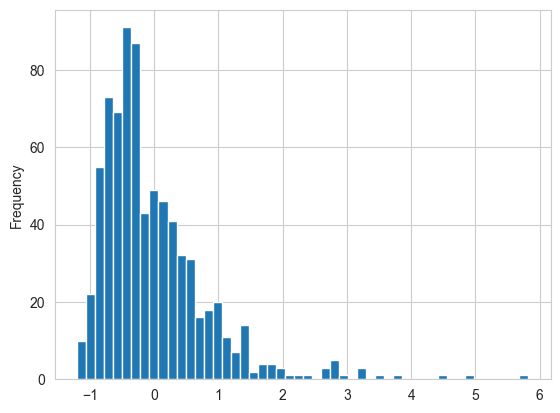

In [24]:
df_imputed['Insulin'].plot(kind='hist', bins=50)

# Categorical Imputer

**Exercise**
- Use KNNImputer to impute missing values in Titanic Dataset
- Use KNNClassifier to run classification task on Titanic dataset
- Try different params, you can use GridSearch
- Detect the best performing model
-

In [ ]:
train_data_path = "https://storage.googleapis.com/edulabs-public-datasets/titanic/titanic-train.csv"
test_data_path = "https://storage.googleapis.com/edulabs-public-datasets/titanic/titanic-test.csv"

# Load Titanic dataset
df = pd.read_csv(train_data_path)

df